In [42]:
%matplotlib inline

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [44]:
housing_data = pd.read_fwf("https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data", header = None)

In [67]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,506.0,1.716290,2.653510,0.00632,0.0819,0.250895,2.326717,9.96654
1,506.0,11.363636,23.322453,0.00000,0.0000,0.000000,12.500000,100.00000
2,506.0,11.136779,6.860353,0.46000,5.1900,9.690000,18.100000,27.74000
3,506.0,0.069170,0.253994,0.00000,0.0000,0.000000,0.000000,1.00000
4,506.0,0.554695,0.115878,0.38500,0.4490,0.538000,0.624000,0.87100
5,506.0,6.284634,0.702617,3.56100,5.8855,6.208500,6.623500,8.78000
6,506.0,68.574901,28.148861,2.90000,45.0250,77.500000,94.075000,100.00000
7,506.0,3.696228,1.999689,0.58570,2.0737,3.107300,5.112625,9.22290
8,506.0,4.332016,1.417166,1.00000,4.0000,4.000000,5.000000,8.00000
9,506.0,408.237154,168.537116,187.00000,279.0000,330.000000,666.000000,711.00000


In [46]:
target = housing_data[13]

In [47]:
attributes = housing_data.drop(columns=[13])

In [48]:
linear_regression = LinearRegression()

In [49]:
linear_regression.fit(attributes, target)

LinearRegression()

In [50]:
linear_regression.score(attributes, target)

0.7198065414937174

In [51]:
predictions = linear_regression.predict(attributes)

In [52]:
mean_squared_error(target, predictions)

23.653807404961373

In [53]:
np.sqrt(((predictions - target) ** 2).sum() / len(target))

4.86351800705635

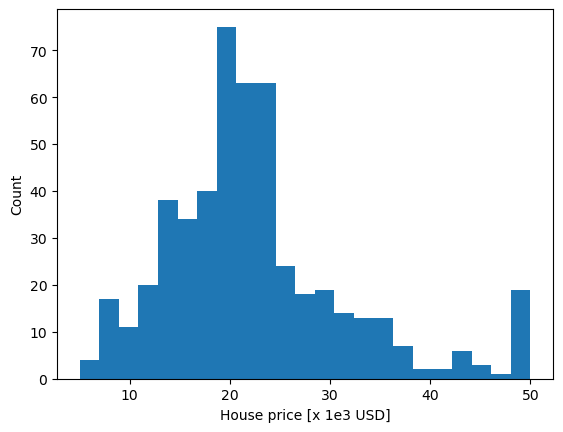

In [54]:
plt.hist(target, bins='fd')
plt.xlabel('House price [x 1e3 USD]') # 1 * (10 ** 3)
plt.ylabel('Count')
plt.show()

In [55]:
target.mean()

22.532806324110677

In [56]:
target.skew()

1.1080984082549072

In [57]:
(np.abs(target - predictions) / target).mean() * 100

17.157373124869423

In [60]:
targets_lt_10k = target[target <= 10]

In [61]:
attributes_lt_10k = housing_data.loc[targets_lt_10k.index].drop(columns=13)

In [63]:
predictions_lt_10k = linear_regression.predict(attributes_lt_10k)

In [64]:
(np.abs(targets_lt_10k - predictions_lt_10k) / targets_lt_10k).mean() * 100

59.87873831261295

In [65]:
linear_regression.coef_

array([ 2.09281375e-01,  1.49403979e-02,  1.27164577e-02,  3.00565375e+00,
       -1.55234852e+01,  4.29955958e+00,  2.84848139e-03, -1.08366345e+00,
        1.93258621e-01, -2.42034372e-03, -9.65535221e-01,  9.43510233e-03,
       -5.25242783e-01])

In [66]:
linear_regression.intercept_ # свободен член

28.30511075009891